In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, auc, f1_score
from matplotlib.colors import ListedColormap
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline, make_union
from sklearn import metrics
import spacy
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer, TfidfTransformer
import nltk
from sqlalchemy import create_engine
from spacy.en import English
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from IPython.display import Image
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from sqlalchemy import create_engine
import patsy
from sklearn import neighbors, metrics
import seaborn as sns
sns.set(color_codes=True)
import os
from imdbpie import Imdb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import subprocess
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy
from imdbpie import Imdb
import requests
import nltk
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import nltk
from collections import Counter
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
import re
import csv
import psycopg2
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.tokenize import sent_tokenize, word_tokenize
%matplotlib inline

In [9]:
import pandas as pd

df = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-06/summaryMovieMORE.csv')

In [10]:
df.tail(1)

,title,location,summary_review,review_score,movie_score,genre
38176,The Usual Suspects,"Groningen, The Netherlands",in one word : fantastic pay attention to the s...,10.0,8.6,Crime


In [11]:
df.isnull().sum()

title             0
location          0
summary_review    4
review_score      0
movie_score       0
genre             0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

title             0
location          0
summary_review    0
review_score      0
movie_score       0
genre             0
dtype: int64

### Split data into X and y dataframes

In [14]:
#pull out reviews for x dataframe
X = df.ix[:,[2]]

In [15]:
#pull out user ratings for y dataframe
y = df.ix[:,[3]]

In [17]:
X.tail()

,summary_review
38172,kevin spacey and the story : you can not do ...
38173,a grip blockbuster firecracker
38174,who say it be plan
38175,believe me!don't miss it
38176,in one word : fantastic pay attention to the s...


In [216]:
###########################################################################
## need to add step here to stem or lematize or clean before vectorizing ##
###########################################################################

### need to vectorize before splitting!! otherwise run into error modeling on mismatching data 

In [18]:
cvecX = CountVectorizer(stop_words='english')
cvecX = cvecX.fit(X.summary_review)

In [19]:
X_TEST = pd.DataFrame(cvecX.transform(X['summary_review']).todense(),
                       columns=cvecX.get_feature_names())

In [20]:
X_TEST.head(2)

,00,000,001,007,03,08,0pg13,10,100,1000,...,zone,zoo,zoom,zootopia,zowie,zubrowka,zweig,zzzzzzzz,zzzzzzzzzz,τhe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#remove int columns

X = X_TEST.iloc[:,207:]
#data.iloc[:,[0,3]]

In [35]:
# need to clean before these steps, abandon and abandoned should be same, same for abbreviate and abbreviated
X.head(1)

,abandon,abandoned,abbas,abbreviate,abbreviated,abduct,abduction,ability,able,abnormal,...,zone,zoo,zoom,zootopia,zowie,zubrowka,zweig,zzzzzzzz,zzzzzzzzzz,τhe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X.shape

(38173, 9413)

In [37]:
y.shape

(38173, 1)

In [38]:
X.tail()

,abandon,abandoned,abbas,abbreviate,abbreviated,abduct,abduction,ability,able,abnormal,...,zone,zoo,zoom,zootopia,zowie,zubrowka,zweig,zzzzzzzz,zzzzzzzzzz,τhe
38168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y.tail()

,review_score
38172,10.0
38173,8.6
38174,10.0
38175,10.0
38176,10.0


### Test Train Split 

In [44]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.50, random_state = 1)

TypeError: Expected sequence or array-like, got estimator        abandon  abandoned  abbas  abbreviate  abbreviated  abduct  abduction  \
0            0          0      0           0            0       0          0   
1            0          0      0           0            0       0          0   
2            0          0      0           0            0       0          0   
3            0          0      0           0            0       0          0   
4            0          0      0           0            0       0          0   
5            0          0      0           0            0       0          0   
6            0          0      0           0            0       0          0   
7            0          0      0           0            0       0          0   
8            0          0      0           0            0       0          0   
9            0          0      0           0            0       0          0   
10           0          0      0           0            0       0          0   
11           0          0      0           0            0       0          0   
12           0          0      0           0            0       0          0   
13           0          0      0           0            0       0          0   
14           0          0      0           0            0       0          0   
15           0          0      0           0            0       0          0   
16           0          0      0           0            0       0          0   
17           0          0      0           0            0       0          0   
18           0          0      0           0            0       0          0   
19           0          0      0           0            0       0          0   
20           0          0      0           0            0       0          0   
21           0          0      0           0            0       0          0   
22           0          0      0           0            0       0          0   
23           0          0      0           0            0       0          0   
24           0          0      0           0            0       0          0   
25           0          0      0           0            0       0          0   
26           0          0      0           0            0       0          0   
27           0          0      0           0            0       0          0   
28           0          0      0           0            0       0          0   
29           0          0      0           0            0       0          0   
...        ...        ...    ...         ...          ...     ...        ...   
38143        0          0      0           0            0       0          0   
38144        0          0      0           0            0       0          0   
38145        0          0      0           0            0       0          0   
38146        0          0      0           0            0       0          0   
38147        0          0      0           0            0       0          0   
38148        0          0      0           0            0       0          0   
38149        0          0      0           0            0       0          0   
38150        0          0      0           0            0       0          0   
38151        0          0      0           0            0       0          0   
38152        0          0      0           0            0       0          0   
38153        0          0      0           0            0       0          0   
38154        0          0      0           0            0       0          0   
38155        0          0      0           0            0       0          0   
38156        0          0      0           0            0       0          0   
38157        0          0      0           0            0       0          0   
38158        0          0      0           0            0       0          0   
38159        0          0      0           0            0       0          0   
38160        0          0      0           0            0       0          0   
38161        0          0      0           0            0       0          0   
38162        0          0      0           0            0       0          0   
38163        0          0      0           0            0       0          0   
38164        0          0      0           0            0       0          0   
38165        0          0      0           0            0       0          0   
38166        0          0      0           0            0       0          0   
38167        0          0      0           0            0       0          0   
38168        0          0      0           0            0       0          0   
38169        0          0      0           0            0       0          0   
38170        0          0      0           0            0       0          0   
38171        0          0      0           0            0       0          0   
38172        0          0      0           0            0       0          0   

       ability  able  abnormal ...   zone  zoo  zoom  zootopia  zowie  \
0            0     0         0 ...      0    0     0         0      0   
1            0     0         0 ...      0    0     0         0      0   
2            0     0         0 ...      0    0     0         0      0   
3            0     0         0 ...      0    0     0         0      0   
4            0     0         0 ...      0    0     0         0      0   
5            0     0         0 ...      0    0     0         0      0   
6            0     0         0 ...      0    0     0         0      0   
7            0     0         0 ...      0    0     0         0      0   
8            0     0         0 ...      0    0     0         0      0   
9            0     0         0 ...      0    0     0         0      0   
10           0     0         0 ...      0    0     0         0      0   
11           0     0         0 ...      0    0     0         0      0   
12           0     0         0 ...      0    0     0         0      0   
13           0     0         0 ...      0    0     0         0      0   
14           0     0         0 ...      0    0     0         0      0   
15           0     0         0 ...      0    0     0         0      0   
16           0     0         0 ...      0    0     0         0      0   
17           0     0         0 ...      0    0     0         0      0   
18           0     0         0 ...      0    0     0         0      0   
19           0     0         0 ...      0    0     0         0      0   
20           0     0         0 ...      0    0     0         0      0   
21           0     0         0 ...      0    0     0         0      0   
22           0     0         0 ...      0    0     0         0      0   
23           0     0         0 ...      0    0     0         0      0   
24           0     0         0 ...      0    0     0         0      0   
25           0     0         0 ...      0    0     0         0      0   
26           0     0         0 ...      0    0     0         0      0   
27           0     0         0 ...      0    0     0         0      0   
28           0     0         0 ...      0    0     0         0      0   
29           0     0         0 ...      0    0     0         0      0   
...        ...   ...       ... ...    ...  ...   ...       ...    ...   
38143        0     0         0 ...      0    0     0         0      0   
38144        0     0         0 ...      0    0     0         0      0   
38145        0     0         0 ...      0    0     0         0      0   
38146        0     0         0 ...      0    0     0         0      0   
38147        0     0         0 ...      0    0     0         0      0   
38148        0     0         0 ...      0    0     0         0      0   
38149        0     0         0 ...      0    0     0         0      0   
38150        0     0         0 ...      0    0     0         0      0   
38151        0     0         0 ...      0    0     0         0      0   
38152        0     0         0 ...      0    0     0         0      0   
38153        0     0         0 ...      0    0     0         0      0   
38154        0     0         0 ...      0    0     0         0      0   
38155        0     0         0 ...      0    0     0         0      0   
38156        0     0         0 ...      0    0     0         0      0   
38157        0     0         0 ...      0    0     0         0      0   
38158        0     0         0 ...      0    0     0         0      0   
38159        0     0         0 ...      0    0     0         0      0   
38160        0     0         0 ...      0    0     0         0      0   
38161        0     0         0 ...      0    0     0         0      0   
38162        0     0         0 ...      0    0     0         0      0   
38163        0     0         0 ...      0    0     0         0      0   
38164        0     0         0 ...      0    0     0         0      0   
38165        0     0         0 ...      0    0     0         0      0   
38166        0     0         0 ...      0    0     0         0      0   
38167        0     0         0 ...      0    0     0         0      0   
38168        0     0         0 ...      0    0     0         0      0   
38169        0     0         0 ...      0    0     0         0      0   
38170        0     0         0 ...      0    0     0         0      0   
38171        0     0         0 ...      0    0     0         0      0   
38172        0     0         0 ...      0    0     0         0      0   

       zubrowka  zweig  zzzzzzzz  zzzzzzzzzz  τhe  
0             0      0         0           0    0  
1             0      0         0           0    0  
2             0      0         0           0    0  
3             0      0         0           0    0  
4             0      0         0           0    0  
5             0      0         0           0    0  
6             0      0         0           0    0  
7             0      0         0           0    0  
8             0      0         0           0    0  
9             0      0         0           0    0  
10            0      0         0           0    0  
11            0      0         0           0    0  
12            0      0         0           0    0  
13            0      0         0           0    0  
14            0      0         0           0    0  
15            0      0         0           0    0  
16            0      0         0           0    0  
17            0      0         0           0    0  
18            0      0         0           0    0  
19            0      0         0           0    0  
20            0      0         0           0    0  
21            0      0         0           0    0  
22            0      0         0           0    0  
23            0      0         0           0    0  
24            0      0         0           0    0  
25            0      0         0           0    0  
26            0      0         0           0    0  
27            0      0         0           0    0  
28            0      0         0           0    0  
29            0      0         0           0    0  
...         ...    ...       ...         ...  ...  
38143         0      0         0           0    0  
38144         0      0         0           0    0  
38145         0      0         0           0    0  
38146         0      0         0           0    0  
38147         0      0         0           0    0  
38148         0      0         0           0    0  
38149         0      0         0           0    0  
38150         0      0         0           0    0  
38151         0      0         0           0    0  
38152         0      0         0           0    0  
38153         0      0         0           0    0  
38154         0      0         0           0    0  
38155         0      0         0           0    0  
38156         0      0         0           0    0  
38157         0      0         0           0    0  
38158         0      0         0           0    0  
38159         0      0         0           0    0  
38160         0      0         0           0    0  
38161         0      0         0           0    0  
38162         0      0         0           0    0  
38163         0      0         0           0    0  
38164         0      0         0           0    0  
38165         0      0         0           0    0  
38166         0      0         0           0    0  
38167         0      0         0           0    0  
38168         0      0         0           0    0  
38169         0      0         0           0    0  
38170         0      0         0           0    0  
38171         0      0         0           0    0  
38172         0      0         0           0    0  

[38173 rows x 9413 columns]

In [41]:
X_test.tail(2)

NameError: name 'X_test' is not defined

In [214]:
X_train.tail(2)

,abandoned,abduction,ability,able,abnormal,abnoxiusness,abomination,abort,abound,absence,...,zack,zany,zeitgeist,zen,zero,zeroth,zhivago,zone,zootopia,zubrowka
7445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train.tail(2)

,review_score
7447,9.0
698,2.0


In [34]:
y_test.tail(2)

,review_score
5193,9.0
235,4.1


In [35]:
# need to normalize the list of words before the split!!!

dtreg = DecisionTreeRegressor()
dtreg.fit(X_train, y_train)
dtreg.score(X_test, y_test)

0.10867196114856836

In [57]:
y_pred = dtreg.predict(X_test)
y_pred

array([ 6.9764329 ,  6.9764329 ,  6.9764329 , ...,  9.29524439,
        6.9764329 ,  6.9764329 ])

In [36]:
# plt.plot(y_pred)
# plt.plot(y_test.values)
#plt.Figure(figsize = (5, 6))

Best score: 3.35467362069
Best depth: 8


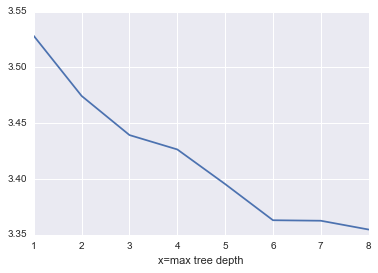

In [37]:
all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 9):
    dtreg = DecisionTreeRegressor(max_depth=i, random_state=1)
    scores = cross_val_score(dtreg, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
dtreg = DecisionTreeRegressor(max_depth=best_depth, random_state=1)
dtreg.fit(X, y)

plt.figure()
plt.plot(range(1, 9), all_scores)
plt.xlabel('x=max tree depth')

In [38]:
import pydot
from sklearn import tree

# convert the column headers to a list
test = list(X.columns.values)

In [39]:
type(test)

list

In [44]:
#test

In [41]:
# remove the unicode!
tester = [x.encode('UTF8') for x in test]


In [45]:
#tester

# Print tree!!! 

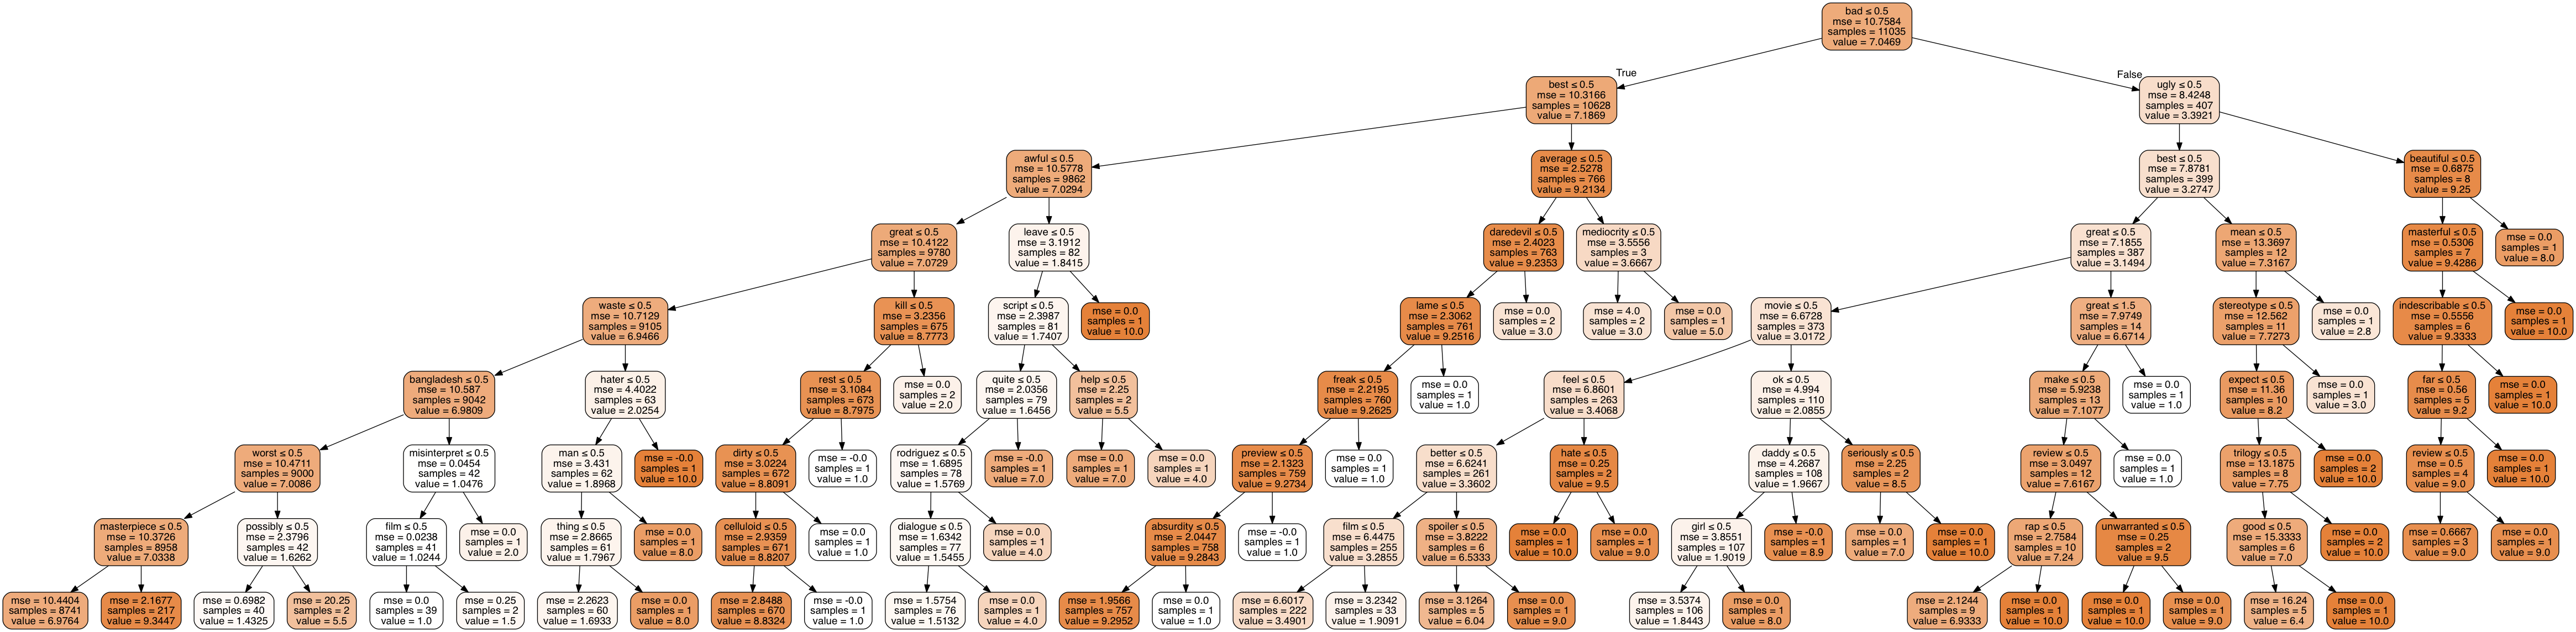

In [43]:
dot_data = StringIO()  
export_graphviz(dtreg, out_file=dot_data, 
                feature_names=tester,  
                filled=True, rounded=True, 
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

# Export png!

In [270]:
import pydot
from sklearn import tree

dotfile = StringIO()
tree.export_graphviz(dtreg, out_file=dotfile,
                    feature_names =tester,
                    filled = True,rounded=True,  
                    special_characters=True)
pydot.graph_from_dot_data(dotfile.getvalue()).write_png("dtree4.png")

True

# Top 20 words 

In [53]:
word_counts = X.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

movie          1966
film           1038
best            808
great           730
good            589
bad             425
time            424
make            389
classic         266
masterpiece     238
better          222
just            220
watch           213
sequel          199
like            185
story           182
life            176
fun             164
review          156
amazing         154
dtype: int64

In [79]:
print 'this is the predicted rating:', y_pred[5]

this is the predicted rating: 6.97643290241


In [75]:
y_test.head()

,review_score
1881,10.0
1771,3.0
1509,9.0
7160,10.0
8037,10.0


In [60]:
# predicst mainly 3s, 6s, 9s which was the initial goal of the test was to see 
# if people thought the movie was great, good or bad.
print 'predicted: ', [i for i in y_pred]

predicted:  [6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 8.8323880597014899, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 8.8323880597014899, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 9.2952443857331524, 9.2952443857331524, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 1.0, 9.2952443857331524, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 6.9764329024139045, 3.4900900900900917, 6.9764329024139045, 6.